# Pendulo Simple Linearizado (Lagrangiano)

In [1]:
%reset -f

import numpy as np
import sympy as smp

import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

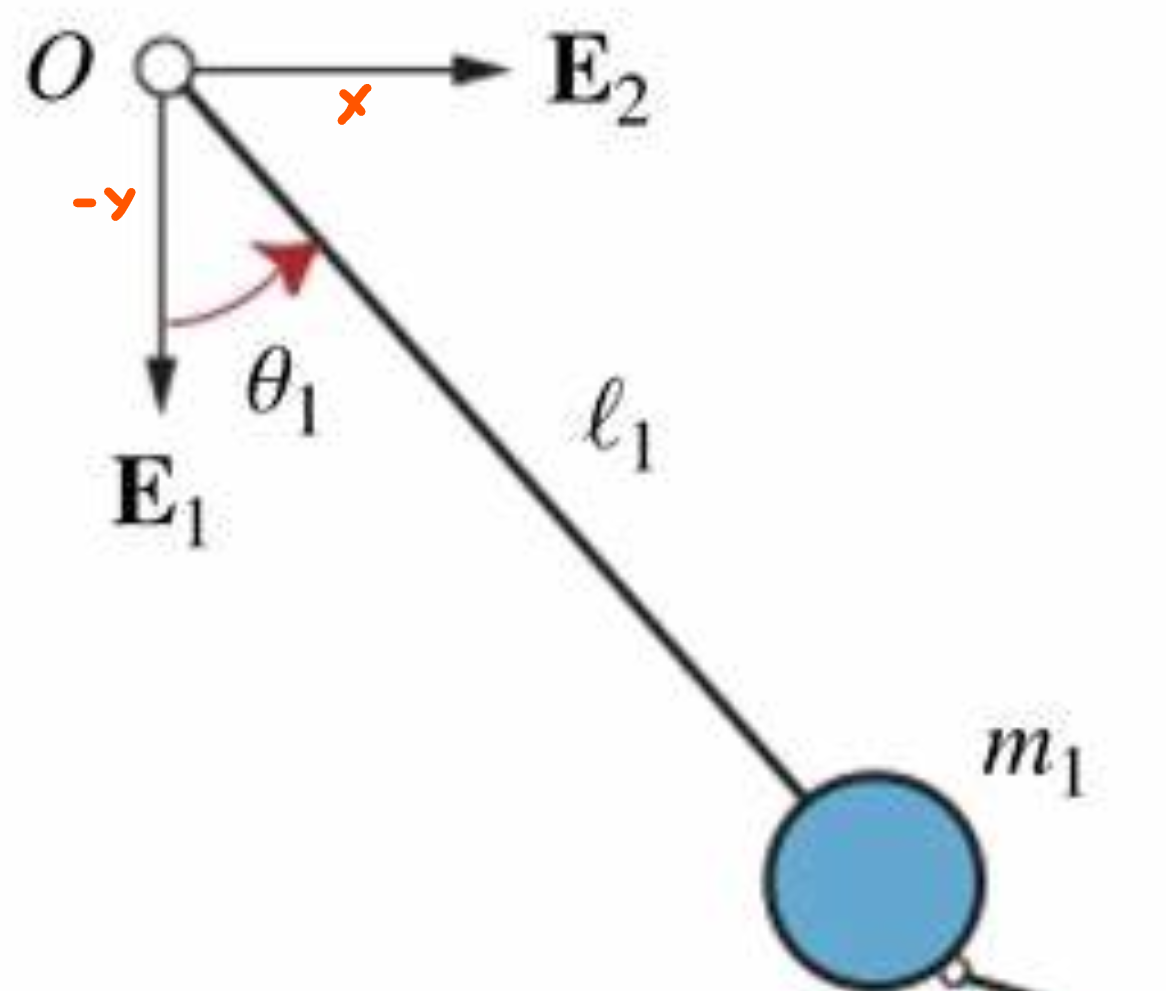

Define los simbolos apropiados en sympy

In [2]:
t, g = smp.symbols('t g', positive=True)
m, L = smp.symbols('m L', positive=True)

Definimos a $\theta$ y a sus dos primeras derivadas temporales

In [3]:
theta = smp.symbols(r'\theta', real=True, cls=smp.Function)(t)
d1_theta = smp.diff(theta, t)
d2_theta = smp.diff(d1_theta, t)

Parametrizamos el movimiento de la masa: <br> <br>

En **x**: $$x = L\sin(\theta(t))$$ <br> <br>

En **y**: $$y = -L\cos(\theta(t))$$

In [4]:
x = L * smp.sin(theta)
y = -L * smp.cos(theta)

vx = smp.diff(x, t)
vy = smp.diff(y, t)

v_squared = (vx**2 + vy**2).simplify(force=True)

Transformamos las funciones simbólicas de velocidad y posición a funciones numéricas

In [5]:
x_f = smp.lambdify((L, theta), x, modules='numpy')
y_f = smp.lambdify((L, theta), y, modules='numpy')

vx_f = smp.lambdify((L, theta, d1_theta), vx, modules='numpy')
vy_f = smp.lambdify((L, theta, d1_theta), vy, modules='numpy')

Definimos la energía cinética y potencial. <br>
Se construye la función Lagrangiana: $L = T - U$

In [6]:
T = smp.Rational(1, 2) * m * v_squared
U = m * g * y
Lag = T - U

In [7]:
Lag

L**2*m*Derivative(\theta(t), t)**2/2 + L*g*m*cos(\theta(t))

Vamos a aproximar a ángulos pequeños sustituyendo lo siguiente: <br>
$\cos(\theta) \approx 1 - \frac{\theta^{2}}{2}$

In [8]:
Lag = Lag.subs(smp.cos(theta), 1 - (theta**2)/2)
Lag

L**2*m*Derivative(\theta(t), t)**2/2 + L*g*m*(1 - \theta(t)**2/2)

Se obtienen las ecuaciones de movimiento:  <br> <br>

$$\dot{p}_{q} - \nabla_{q}L = 0$$ <br> <br>

donde:  <br> <br>

$$p_{q} = \nabla_{\dot{q}}L$$

In [9]:
gen_p = smp.diff(Lag, d1_theta)
gen_f = smp.diff(Lag, theta)
eq = smp.diff(gen_p, t) - gen_f

In [10]:
eq

L**2*m*Derivative(\theta(t), (t, 2)) + L*g*m*\theta(t)

Se resuelve la ecuación de movimiento simbolicamente

In [11]:
gen_sol = smp.dsolve(eq, theta)
gen_sol

Eq(\theta(t), C1*sin(sqrt(g)*t/sqrt(L)) + C2*cos(sqrt(g)*t/sqrt(L)))

Derivando una vex con respecto al tiempo podemos calcular la velocidad angular

In [12]:
gen_sol.rhs.diff(t)

C1*sqrt(g)*cos(sqrt(g)*t/sqrt(L))/sqrt(L) - C2*sqrt(g)*sin(sqrt(g)*t/sqrt(L))/sqrt(L)

Se resuelve la ecuación de movimiento simbolicamente con condiciones iniciales

In [13]:
t0 = 0
theta0 = smp.pi/5
d1_theta0 = 0

In [14]:
S0 = {theta.subs(t, t0):theta0, d1_theta.subs(t, t0):d1_theta0}

In [15]:
eq

L**2*m*Derivative(\theta(t), (t, 2)) + L*g*m*\theta(t)

In [16]:
theta_explicit = smp.dsolve(eq, theta, ics=S0).rhs
theta_explicit

pi*cos(sqrt(g)*t/sqrt(L))/5

Derivamos para obtener la velocidad angular

In [17]:
d1_theta_explicit = theta_explicit.diff(t)
d1_theta_explicit

-pi*sqrt(g)*sin(sqrt(g)*t/sqrt(L))/(5*sqrt(L))

Transformamos las funciones simbólicas a numéricas

In [20]:
d1_theta_explicit

-pi*sqrt(g)*sin(sqrt(g)*t/sqrt(L))/(5*sqrt(L))

In [22]:
theta_explicit_f = smp.lambdify((t, g, L), theta_explicit, modules='numpy')

d1_theta_explicit_f = smp.lambdify((t, g, L), d1_theta_explicit, modules='numpy')

Definimos un arreglo de puntos en el tiempo en el cual queremos evaluar la solución

In [23]:
t0 = 0
tf = 40
t_size = 4001
t = np.linspace(t0, tf, t_size)

Se definen algunas constantes (aceleración de la gravedad y masa)

In [24]:
g = 9.81
m = 2
L = 3

Guardamos la solución y se grafica

In [27]:
theta_sol = theta_explicit_f(t, g, L)
d1_theta_sol = d1_theta_explicit_f(t, g, L)

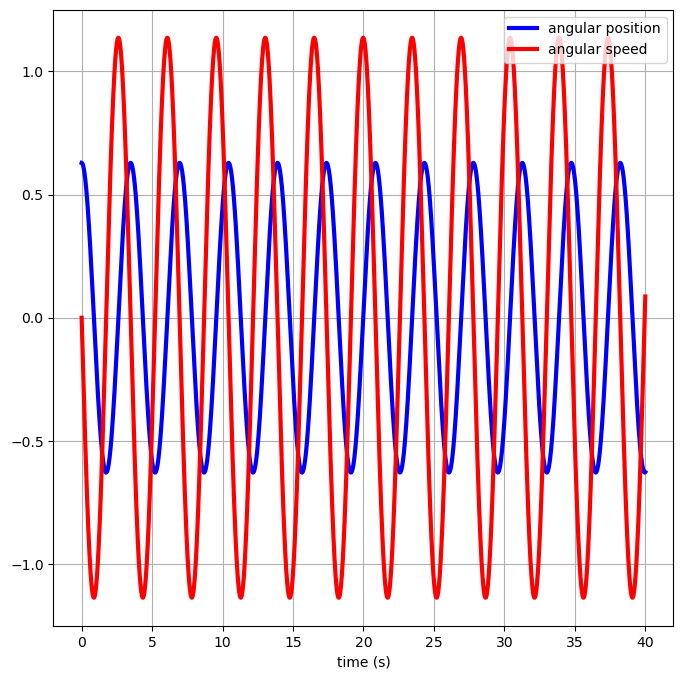

In [34]:
plt.figure(figsize=(8, 8))

plt.plot(t, theta_sol, lw=3, c='blue', label='angular position')
plt.plot(t, d1_theta_sol, lw=3, c='red', label='angular speed')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

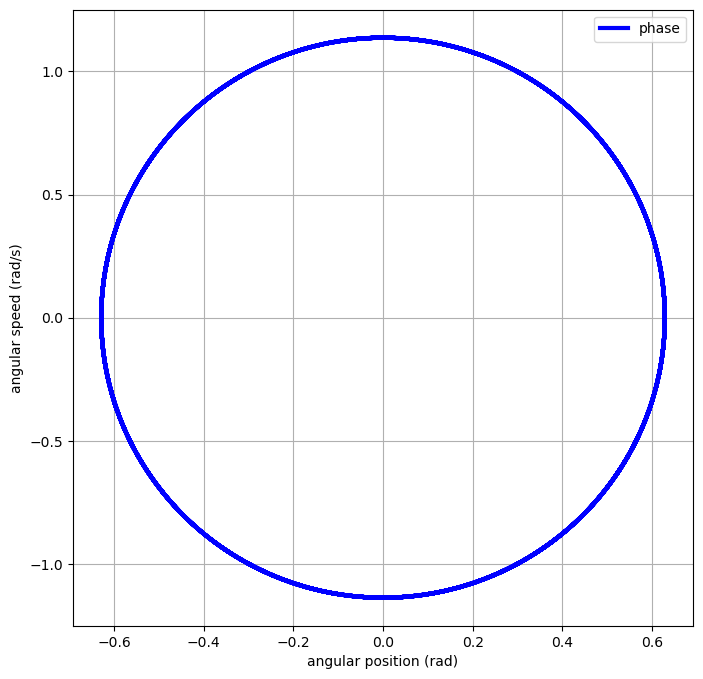

In [36]:
plt.figure(figsize=(8, 8))

plt.plot(theta_sol, d1_theta_sol, lw=3, c='blue', label='phase')

plt.ylabel('angular speed (rad/s)')
plt.xlabel('angular position (rad)')
plt.legend()
plt.grid()
plt.show()

Creamos funciones donde ingresamos las funciones númericas de posición y velocidad anteriormente transformadas

In [47]:
def eval_positions(L, theta):
    return [
        x_f(L, theta),
        y_f(L, theta)
    ]

def eval_velocities(L, theta, d1_theta):
    return [
        vx_f(L, theta, d1_theta),
        vy_f(L, theta, d1_theta)
    ]

Calculamos las posiciones y velocidades en $x$ e $y$

In [48]:
x, y = eval_positions(L, theta_sol)
vx, vy = eval_velocities(L, theta_sol, d1_theta_sol)

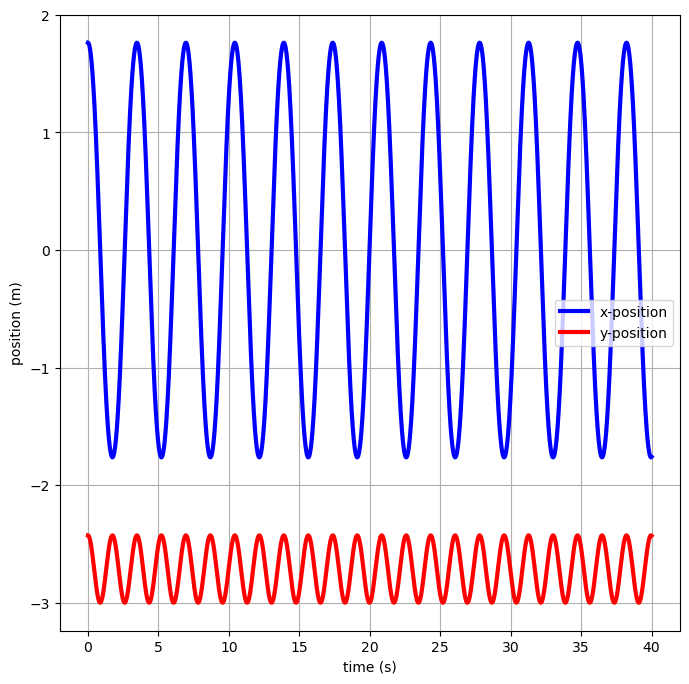

In [54]:
plt.figure(figsize=(8, 8))

plt.plot(t, x, lw=3, c='blue', label='x-position')
plt.plot(t, y, lw=3, c='red', label='y-position')

plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.grid()
plt.show()

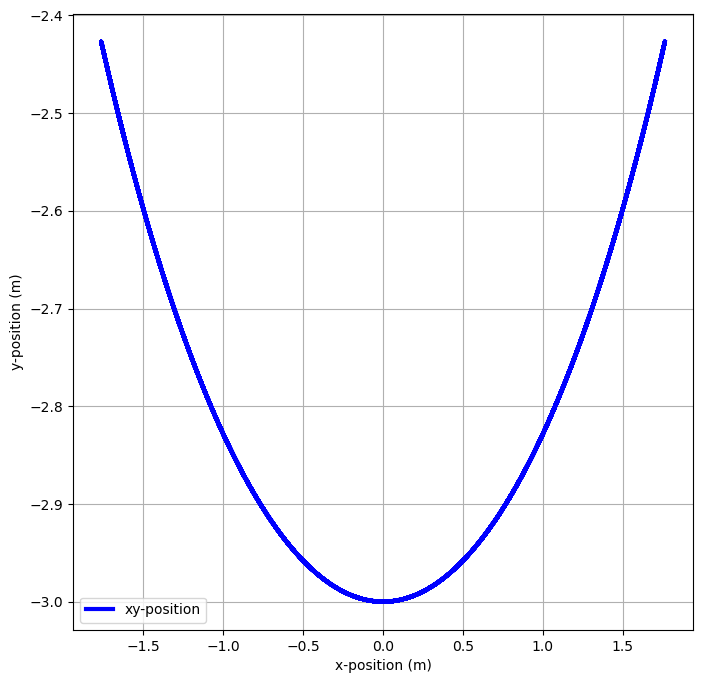

In [55]:
plt.figure(figsize=(8, 8))

plt.plot(x, y, lw=3, c='blue', label='xy-position')

plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.legend()
plt.grid()
plt.show()

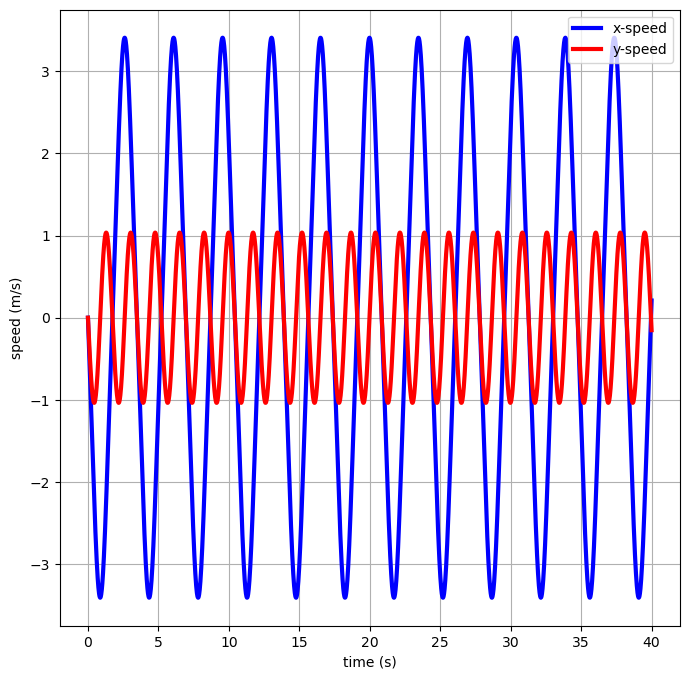

In [59]:
plt.figure(figsize=(8, 8))

plt.plot(t, vx, lw=3, c='blue', label='x-speed')
plt.plot(t, vy, lw=3, c='red', label='y-speed')

plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')
plt.legend()
plt.grid()
plt.show()

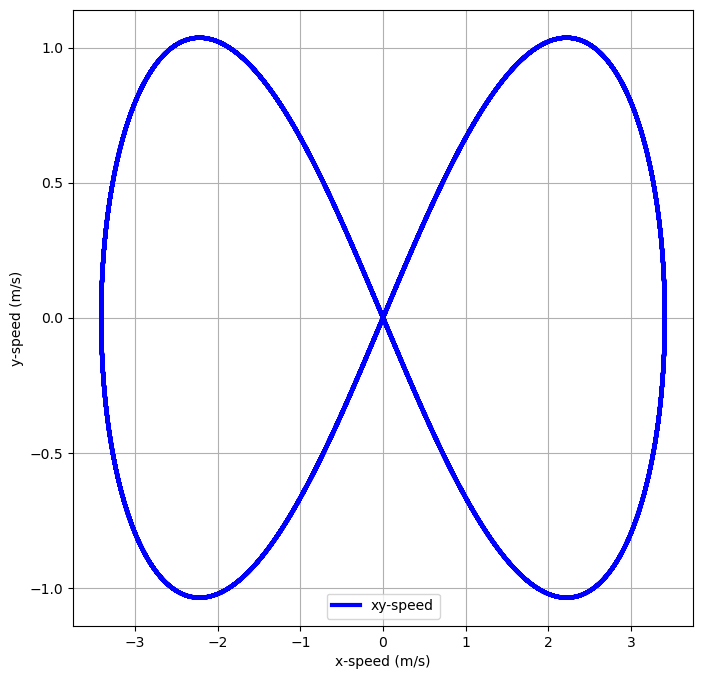

In [60]:
plt.figure(figsize=(8, 8))

plt.plot(vx, vy, lw=3, c='blue', label='xy-speed')

plt.xlabel('x-speed (m/s)')
plt.ylabel('y-speed (m/s)')
plt.legend()
plt.grid()
plt.show()

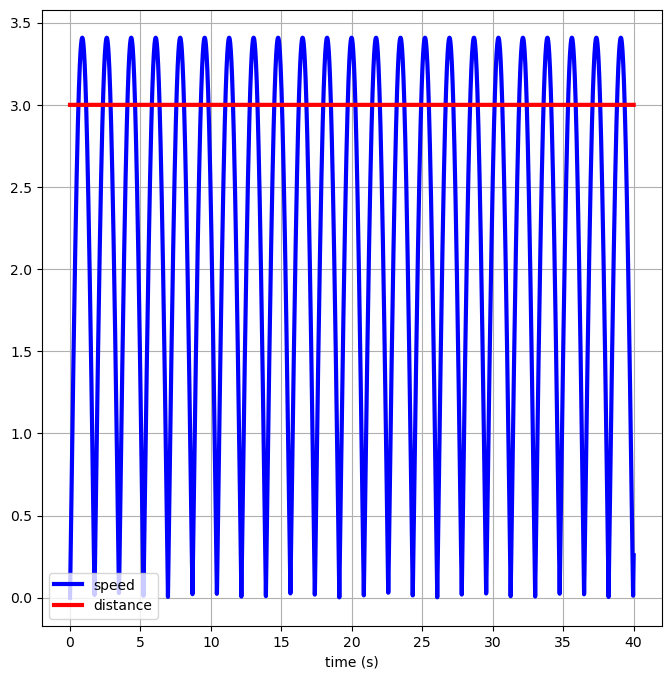

In [63]:
plt.figure(figsize=(8, 8))

plt.plot(t, np.sqrt(vx**2 + vy**2), lw=3, c='blue', label='speed')
plt.plot(t, np.sqrt(x**2 + y**2), lw=3, c='red', label='distance')

plt.xlabel('time (s)')
plt.legend()
plt.grid()
plt.show()

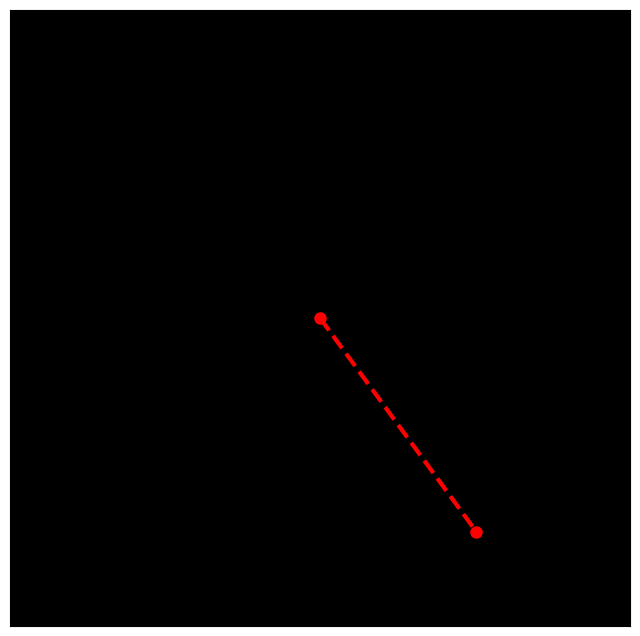

In [73]:
fps = len(t[t<1])
frames = t_size - 1
interval = (tf/frames)*1000

def animate(i):
    ln1.set_data([0, x[i]], [0, y[i]])

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)

ax.set_xlim(-L-0.5, L+0.5)
ax.set_ylim(-L-0.5, L+0.5)

ani = animation.FuncAnimation(fig, animate, frames=frames, interval=interval)
ani.save('Animations/simple_pendulum_linearized.mp4', writer='ffmpeg', fps=fps)